<a href="https://colab.research.google.com/github/Yashas14/A_Compartive_Analysis_of_Time_Series_Forecasting_For_Energy_Consumption_Using_XGBoost_and_LSTM/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing
from sklearn.metrics import r2_score
from keras.layers import Dense,Dropout,SimpleRNN,LSTM
from keras.models import Sequential

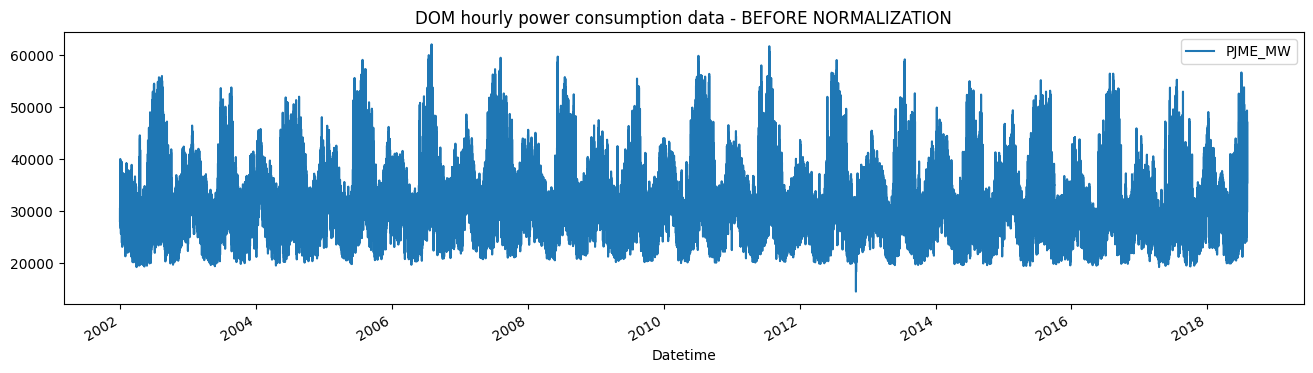

In [ ]:
fpath='/content/PJME_hourly.csv'


df = pd.read_csv(fpath, index_col='Datetime', parse_dates=['Datetime'])
df.head()

df.isna().sum()


df.plot(figsize=(16,4),legend=True)

plt.title('DOM hourly power consumption data - BEFORE NORMALIZATION')

plt.show()

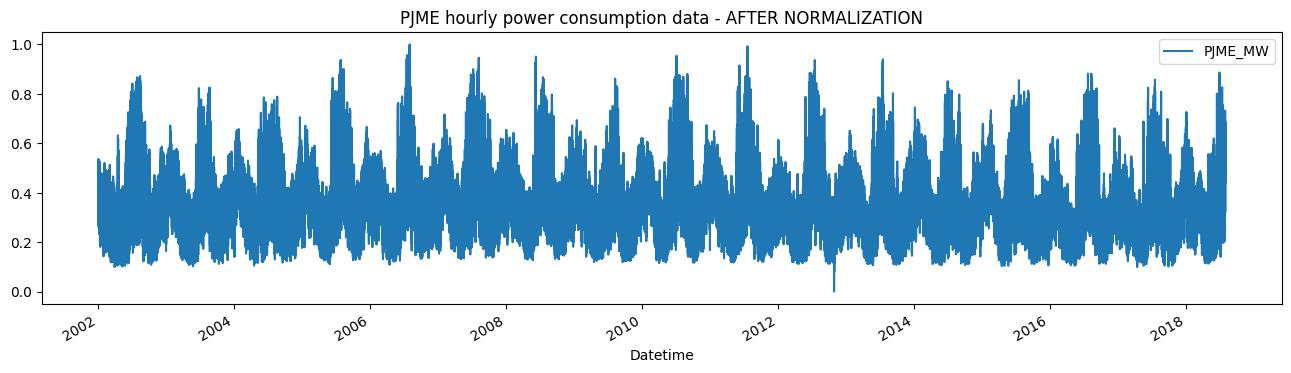

In [ ]:
def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['PJME_MW']=scaler.fit_transform(df['PJME_MW'].values.reshape(-1,1))
    return df

df_norm = normalize_data(df)
df_norm.shape


df_norm.plot(figsize=(16,4),legend=True)

plt.title('PJME hourly power consumption data - AFTER NORMALIZATION')

plt.show()

In [ ]:
def load_data(stock, seq_len):
    X_train = []
    y_train = []
    for i in range(seq_len, len(stock)):
        X_train.append(stock.iloc[i - seq_len: i, 0])
        y_train.append(stock.iloc[i, 0])

    X_test = X_train[110000:]
    y_test = y_train[110000:]

    X_train = X_train[:110000]
    y_train = y_train[:110000]

    X_train = np.array(X_train)
    y_train = np.array(y_train)

    X_test = np.array(X_test)
    y_test = np.array(y_test)

    X_train = np.reshape(X_train, (110000, seq_len, 1))

    X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

    return [X_train, y_train, X_test, y_test]

In [ ]:
seq_len = 20

X_train, y_train, X_test, y_test = load_data(df, seq_len)

print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (110000, 20, 1)
y_train.shape =  (110000,)
X_test.shape =  (35346, 20, 1)
y_test.shape =  (35346,)


In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(40,activation="tanh",return_sequences=True, input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40,activation="tanh",return_sequences=True))
lstm_model.add(Dropout(0.15))
lstm_model.add(LSTM(40,activation="tanh",return_sequences=False))
lstm_model.add(Dropout(0.15))
lstm_model.add(Dense(1))
lstm_model.summary()
lstm_model.compile(optimizer="SGD",loss="MSE",metrics=['accuracy'])
lstm_model.fit(X_train, y_train, epochs=11, batch_size=1000)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 20, 40)            6720      
                                                                 
 dropout_3 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_4 (LSTM)               (None, 20, 40)            12960     
                                                                 
 dropout_4 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_5 (LSTM)               (None, 40)                12960     
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
lstm_predictions = lstm_model.predict(X_test)
lstm_score = r2_score(y_test, lstm_predictions)
print("R^2 Score of LSTM model = ",lstm_score)

1105/1105 [==============================] - 4s 3ms/step
R^2 Score of LSTM model =  0.09071378547288433


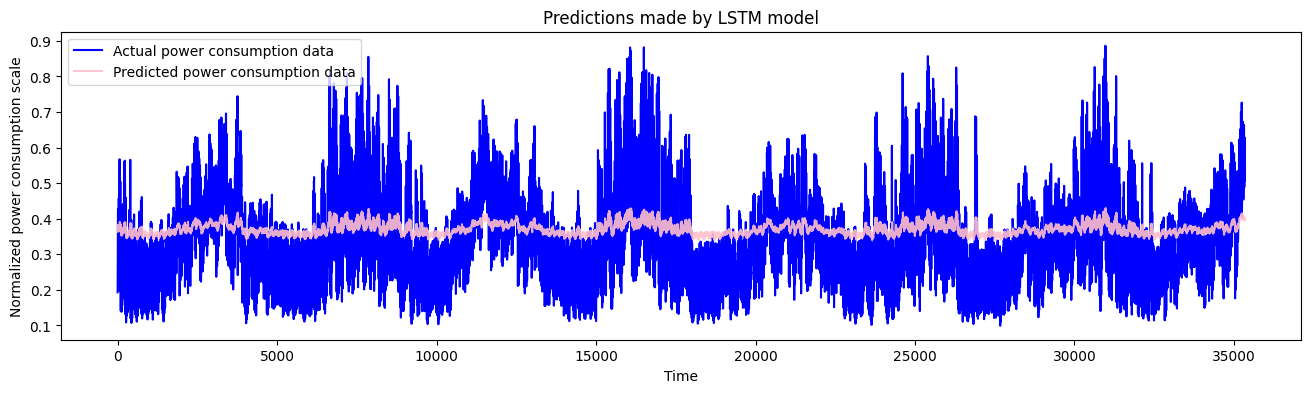

In [ ]:
def plot_predictions(test, predicted, title):
    plt.figure(figsize=(16, 4))
    plt.plot(test, color='blue', label='Actual power consumption data')
    plt.plot(predicted, alpha=0.9, color='pink', label='Predicted power consumption data')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Normalized power consumption scale')
    plt.legend()
    plt.show()
plot_predictions(y_test, lstm_predictions, "Predictions made by LSTM model")



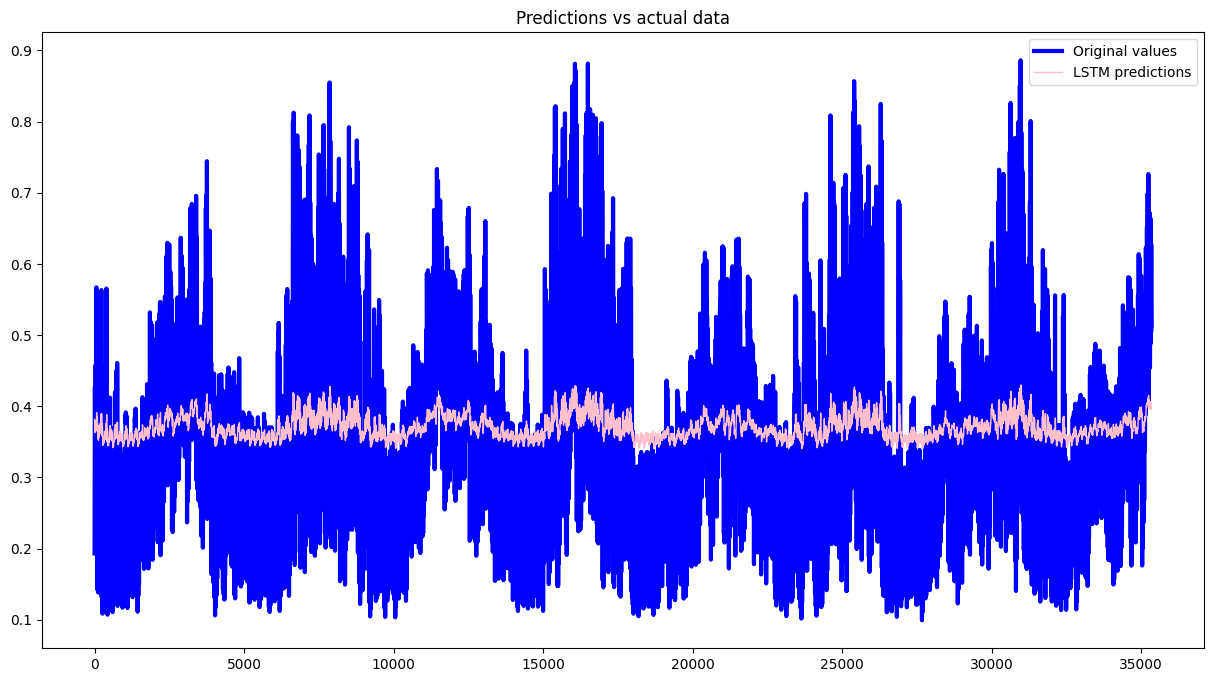

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_test, c="blue", linewidth=3, label="Original values")
plt.plot(lstm_predictions, c="pink", linewidth=1, label="LSTM predictions")
plt.legend()
plt.title("Predictions vs actual data", )
plt.show()

In [ ]:
print(y_test)

[0.19315285 0.22526072 0.28625303 ... 0.58691668 0.53976614 0.50698409]


In [ ]:
lstm_predictions

array([[0.38167244],
       [0.3788253 ],
       [0.37571636],
       ...,
       [0.39750153],
       [0.3984977 ],
       [0.39943624]], dtype=float32)

In [ ]:
len(y_test)

35346

In [ ]:
len(lstm_predictions)

35346

In [ ]:
mean=sum(y_test)/len(y_test)
mean

0.35410820418925304

In [ ]:
mean1=sum(lstm_predictions)/len(lstm_predictions)
mean1

array([0.37018564], dtype=float32)

In [ ]:
accuracy=((mean/mean1)*100)
print(accuracy,'%')

[95.65693] %
